## DEVSTACK SOLUTIONS INTERNSHIP

### PROJECT 1: FAKE NEWS DETECTION SYSTEM 

#### Name: Swetha Sundari Vellaluru

##### Steps to implement Fake News Detection System
Main Agenda: Particular type of news is Fake or Real
1. Importing libraries, reading the data and converting the fake and real into binary numbers
2. Performing text-preprocessing on the data which involves stemming
3. Splitting the data into train and test sets and Performing vectorizer on train and test set
4. Building models and calculating the accuracy score(SGD, RANDOM FOREST, LOGISTIC REGRESSION,SVM,PASSIVE AGRESSIVE)
5. Selecting the best model and checking with the news article texts

#### Step 1: IMPORTING LIBRARIES

In [57]:
import pandas as pd
import re
import seaborn as sns
from sklearn import model_selection, svm
from wordcloud import WordCloud, STOPWORDS
import string
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem import PorterStemmer
#from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

#### Step 2: READING THE DATA

In [13]:
news_data = pd.read_csv('news.csv')

In [14]:
news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Step 3: DATA EXPLORATION

In [15]:
news_data["news_articles"] = news_data["title"] + news_data["text"]
news_data.sample(frac = 1) #Shuffle 100%

,Unnamed: 0,title,text,label,news_articles
5856,10160,Another Project Veritas Bombshell: Pro-Clinton...,We Are Change \nIn the fourth undercover video...,FAKE,Another Project Veritas Bombshell: Pro-Clinton...
649,1297,Kasich: Voters Are ‘Starting to Pay Attention’,CHARLESTON – John Kasich isn’t sure how he got...,REAL,Kasich: Voters Are ‘Starting to Pay Attention’...
623,2052,Hillary’s No Slam Dunk in 2016,Could Hillary Clinton be the next Richard Nixo...,REAL,Hillary’s No Slam Dunk in 2016Could Hillary Cl...
3884,4814,Putting Presidential Polls in Perspective,Both Donald Trump and Hillary Clinton have str...,REAL,Putting Presidential Polls in PerspectiveBoth ...
5650,8447,"Geoengineering Watch Global Alert News, Novemb...",geoengineeringwatch.org \nThe power structure ...,FAKE,"Geoengineering Watch Global Alert News, Novemb..."
...,...,...,...,...,...
2823,836,The new mess Republicans have created for them...,The Republican Party has put itself in an impo...,REAL,The new mess Republicans have created for them...
5695,2982,Rand Paul wraps 'filibuster' over Patriot Act ...,Washington (CNN) After 10 hours and 30 minutes...,REAL,Rand Paul wraps 'filibuster' over Patriot Act ...
2296,7921,How WiFi & Other EMFs Cause Biological Harm,How WiFi & Other EMFs Cause Biological Harm Pr...,FAKE,How WiFi & Other EMFs Cause Biological HarmHow...
5442,243,‘Supermajority’ of House Freedom Caucus to bac...,Hard-line conservatives cleared a path Wednesd...,REAL,‘Supermajority’ of House Freedom Caucus to bac...


In [16]:
news_data.label[news_data.label == 'REAL'] = 1
news_data.label[news_data.label == 'FAKE'] = 0

#displaying the 0's and 1's
news_data["label"].value_counts()

1    3171
0    3164
Name: label, dtype: int64

In [17]:
news_data = news_data.loc[:,['news_articles','label']]
news_data = news_data.dropna()

Text(0.5, 1.0, 'Percentage of Real and Fake data count')

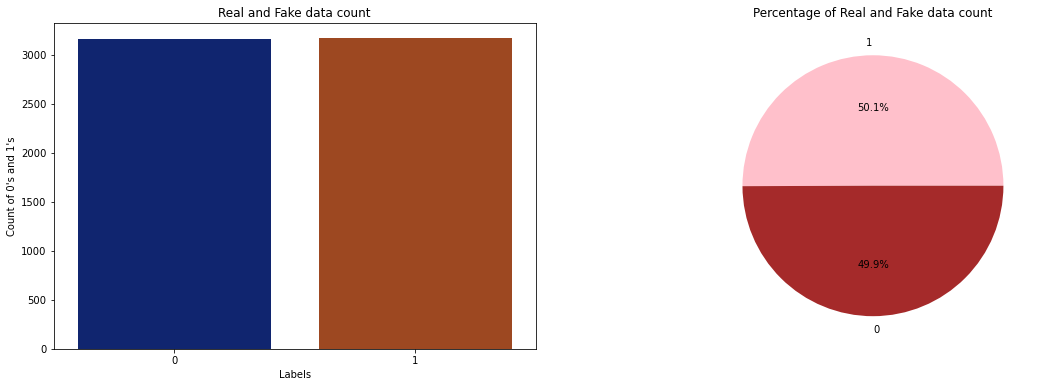

In [19]:
#displaying real and fake data in bar graph and pie chart 
fig, ax = plt.subplots(1,2, figsize=(19, 6))
g1 = sns.countplot(news_data.label,ax=ax[0],palette="dark");
g1.set_title("Real and Fake data count")
g1.set_ylabel("Count of 0's and 1's")
g1.set_xlabel("Labels")
g2 = plt.pie(news_data["label"].value_counts().values,explode=[0,0],labels=news_data.label.value_counts().index, autopct='%1.1f%%',colors=['Pink','Brown'])
fig.show()
plt.title('Percentage of Real and Fake data count')

#### STEP 4: TEXT PRE PROCESSING

In [20]:
#removing special charecters like punctuations, html contents, newline charecters, alphanumeric, perform tokenisation
#text pre-processing and converting all the words into lower cases. 
def pre_processing(word):
    word = word.lower()
    word = re.sub('\[.*?\]', '', word)
    word = re.sub("\\W"," ",word) 
    word = re.sub('https?://\S+|www\.\S+', '', word)
    word = re.sub('<.*?>+', '', word)
    word = re.sub('[%s]' % re.escape(string.punctuation), '', word)
    word = re.sub('\n', '', word)
    word = re.sub('\w*\d\w*', '', word)    
    return word

In [21]:
#applying the above function to news_articles column 
news_data["news_articles"] = news_data["news_articles"].apply(pre_processing)

##### Stemming

In [22]:
porter_stemming = PorterStemmer()

In [23]:
#stemming is a process where the words are stemmed i.e studying becomes study, travelling becomes travel
#all the words are stemmed using stop words
def stemming_process(texts):
    stem_text = re.sub('[^a-zA-Z]',' ',texts)
    stem_text = stem_text.lower()
    stem_text = stem_text.split()
    stem_text = [porter_stemming.stem(x) for x in stem_text if not x in stopwords.words('english')]
    stem_text = ' '.join(stem_text)
    return stem_text

In [24]:
#applying the above function to news_articles column 
news_data["news_articles"] = news_data["news_articles"].apply(stemming_process)

In [66]:
#data after stemming process
news_data["news_articles"].head()

0    smell hillari feardaniel greenfield shillman j...
1    watch exact moment paul ryan commit polit suic...
2    kerri go pari gestur sympathyu secretari state...
3    berni support twitter erupt anger dnc tri warn...
4    battl new york primari mattersit primari day n...
Name: news_articles, dtype: object

#### WORDCLOUD OF FAKE AND REAL LABEL

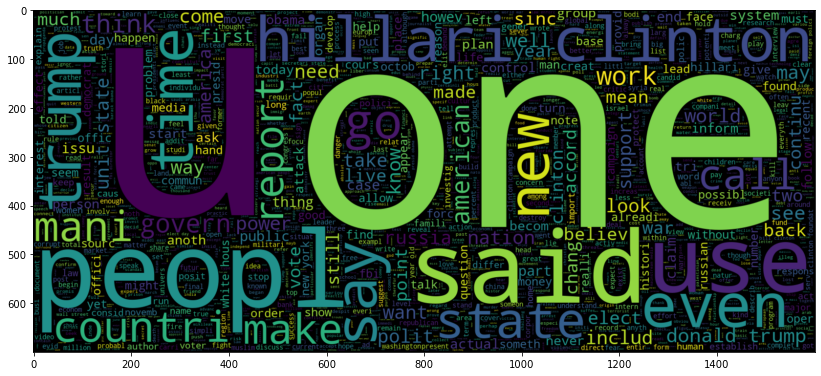

In [25]:
#word used in FAKE news 
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(news_data[news_data.label== 0].news_articles))
plt.imshow(wc, interpolation="bilinear")



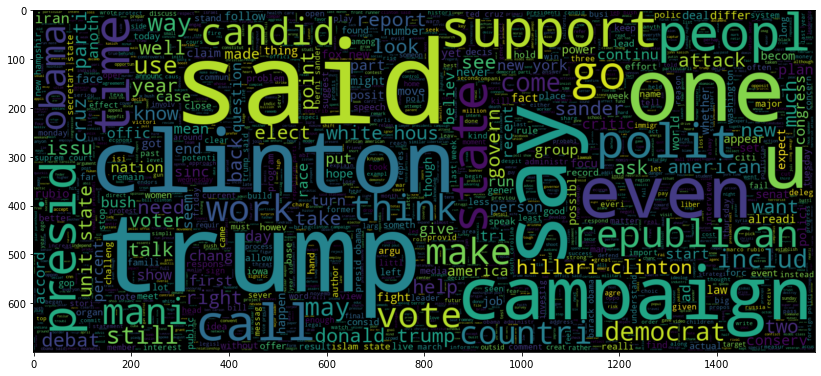

In [26]:
#word used in REAL news 
plt.figure(figsize=(14,14))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(news_data[news_data.label== 1].news_articles))
plt.imshow(wc, interpolation="bilinear")



#### Step 5: SPLITTING THE DATA INTO TRAIN TEST AND BUILDING THE MODEL

In [27]:
x = news_data['news_articles']
y = news_data['label'].astype(int)

In [28]:
#Split the dataset on 90% of training set and 10% of test set 
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.1, random_state=7)

In [29]:
#Initialisation of TFIDFvectorizer- converts the text into meaningful representation of numbers 
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
vector_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [30]:
#fit and transform the training and test dataset
train_tfidf = vector_tfidf.fit_transform(X_train) 
test_tfidf = vector_tfidf.transform(X_test)

In [31]:
#function to plot the confusion matrix
#REFERENCE: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Step 6: MODEL BUILDING

### LOGISTIC REGRESSION

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(train_tfidf,Y_train)

LogisticRegression()

In [34]:
#predict on test set and calculate accuracy
log_pred = log_model.predict(test_tfidf)
log_acc =accuracy_score(Y_test,log_pred)
print(f'Logistic Regression Accuracy: {round(log_acc*100,2)}%')

Logistic Regression Accuracy: 94.16%


Confusion matrix, without normalization


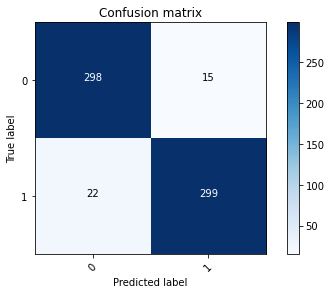

In [35]:
log_matrix = metrics.confusion_matrix(Y_test,log_pred)
plot_confusion_matrix(log_matrix, classes=['0', '1'])

### PASSIVE AGGRESSIVE CLASSIFIER

In [36]:
#Initialize a PassiveAggressiveClassifier
passive_agg =PassiveAggressiveClassifier(max_iter=50)

In [39]:
#fitting the model
passive_agg.fit(train_tfidf,Y_train)

#fitting the model and calculating accuracy
pass_pred =passive_agg.predict(test_tfidf)
pass_score=accuracy_score(Y_test,pass_pred)
print(f'Passive Agressive Accuracy: {round(pass_score*100,2)}%')

Passive Agressive Accuracy: 94.79%


Confusion matrix, without normalization


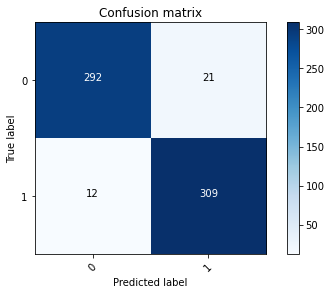

In [41]:
pass_matrix = metrics.confusion_matrix(Y_test, pass_pred)
plot_confusion_matrix(pass_matrix, classes=['0', '1'])

### RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier(random_state=0)
r_forest.fit(train_tfidf, Y_train)

RandomForestClassifier(random_state=0)

In [44]:
rfclass_pred = r_forest.predict(test_tfidf)
rfc_score = accuracy_score(Y_test,rfclass_pred)
print(f'Random Forest Accuracy: {round(rfc_score*100,2)}%')

Random Forest Accuracy: 90.38%


Confusion matrix, without normalization


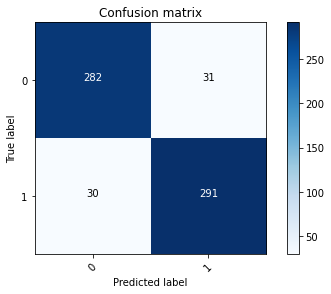

In [46]:
random_matrix = metrics.confusion_matrix(Y_test,rfclass_pred)
plot_confusion_matrix(random_matrix, classes=['0', '1'])

### SUPPORT VECTOR MACHINE (SVM)

In [47]:
#SVM algorithm initialise
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

In [48]:
#fitting a model
SVM.fit(train_tfidf,Y_train)
#predicting on validation set and calculating accuracy
SVM_pred = SVM.predict(test_tfidf)
SVM_accscore = accuracy_score(SVM_pred, Y_test)
print("SVM Accuracy Score -> ",round(SVM_accscore*100))

SVM Accuracy Score ->  96


Confusion matrix, without normalization


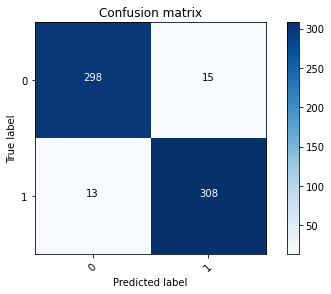

In [49]:
svm_matrix = metrics.confusion_matrix(Y_test,SVM_pred)
plot_confusion_matrix(svm_matrix, classes=['0', '1'])

### STOCHASTIC GRADIENT DESCENT  (SGD)

In [53]:
#SGD classifier
SGD = SGDClassifier()

In [54]:
#predicting on validation test and calculating accuracy
model_SGD = SGD.fit(train_tfidf, Y_train)
SGD_pred = model_SGD.predict(test_tfidf)
SGD_accuracy_score = accuracy_score(Y_test,SGD_pred)
print("SGD Model Accuracy: {}%".format(round(accuracy_score(Y_test,SGD_pred)*100,2)))

SGD Model Accuracy: 95.27%


Confusion matrix, without normalization


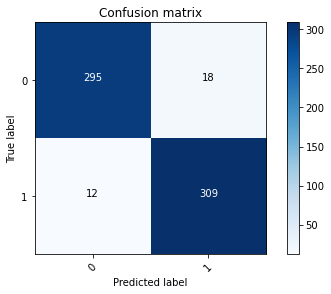

In [55]:
#confusion matrix
SGD_matrix = metrics.confusion_matrix(Y_test,SGD_pred)
plot_confusion_matrix(SGD_matrix, classes=['0', '1'])

### SUMMARY OF ALL THE ALGORITHMS

In [64]:
#we are comparing all the algorithms here
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]

x.add_row(["SVM Algorithm", round(SVM_accscore,2)])
x.add_row(["Passive Agressive Algorithm", round(pass_score,2)])
x.add_row(["Stochastic Gradient Descent", round(SGD_accuracy_score,2)])
x.add_row(["LogisticRegression Algorithm", round(log_acc,2)])
x.add_row(["Random Forest Algorithm", round(rfc_score,2)])                                    

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.96   |
| Passive Agressive Algorithm  |   0.95   |
| Stochastic Gradient Descent  |   0.95   |
| LogisticRegression Algorithm |   0.94   |
|   Random Forest Algorithm    |   0.9    |
+------------------------------+----------+




Considered SVM to check the Fake and Real News

In [67]:
def fake_news_pred(text_input):
    news_input = [text_input]
    vectorised_data = vector_tfidf.transform(news_input)
    fake_news_prediction = SVM.predict(vectorised_data)
    print(fake_news_prediction)

In [68]:
fake_news_pred('With all three Clintons in Iowa, a glimpse at the fire that has eluded Hillary Clinton‚Äôs campaign')

[1]


In [69]:
fake_news_pred('10 Ways America Is Preparing for World War 3')

[0]


In [70]:
fake_news_pred('With 3:20 a.m. tweet storm Saturday, Clinton continues to mock Trump‚Äôs Friday ‚Äòmeltdown‚Äô')

[1]


In [71]:
fake_news_pred('You Can Smell Hillary‚Äôs Fear')

[0]
